### We study the auto-correlation of the velocities $C(\tau)$. In particular, we use the scaled logarithm of the velocities, $u=ln(v/<v>)$.

### We fit the data with a double-exponential function and we also use the 2 cases: the original processed data and the interpolated data in order to compare

### Finally, we obtain the individual profile of the auto-correlation

$\Large u=\ln \left( \frac{v}{\langle v \rangle} \right)$

$\Large C(\tau) = \frac{\langle \left[u(t)-\langle u(t) \rangle \right] \left[ u(t+\tau)-\langle u(t) \rangle \right] \rangle}{\langle \left[ u(t)-\langle u(t) \rangle \right]^{2} \rangle }$

# INDEX

    1. Autocorrelation Original Data
        1.1. Plot and exponential fit
        
    2. Autocorrelation Interpolated Data
        2.1. Plot and exponential fit
        
    3. Comparing original and interpolated data
    
    4. Individual Autocorrelation
        
        

In [5]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle
from math import sin, cos, sqrt, atan2, radians

# Color blind library
plt.style.use('tableau-colorblind10')          
plt.style.library['tableau-colorblind10']

# Haversine formula for distance between GPS locations
def getDistanceFromLatLonInM(lat1,lon1,lat2,lon2):
    """ Function that returns the distance in metres between 2 GPS locations in degrees (latitude and longitude).
    It is based in the Haversine formula (https://en.wikipedia.org/wiki/Haversine_formula) which takes into account the
    Earth's curvature. 
    
    Input:
        - 2 GPS coordinates: (latitude1,longitude1) of the first point and (latitude2,longitude2) of the second point. 
        
    Output:
        - Distance in metres between the two GPS locations.
    """
    
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    e= d*1000 #distance in m
    
    return e


# Double exponential function: f(x)=A·e^(-a·x) + B·e^(-b·x) + C
def expDouble(x,a,A,b,B,C):
    return A*np.exp(-a*x)+ B*np.exp(-b*x)+ C


# 1. Autocorrelation Original Data


The code works as follows:
    
    1. Loop over N consecutive points. s=1,...,600
    
    2. For each "s", we iterate over all invidiual journeys (csv files)
    
    3. For a given participant, we obtain the scaled velocity vector 
$$u(t)=ln\left(\frac{v(t)}{<v>}\right)$$
    
    4. Then we compute the scaled auto-correlation for a given s. To do so, first we scale the velocity vector as
$$u^{*}(t)= \frac{[u(t)-<u(t)>]}{\sigma_{u}}$$

    4. And then we compute

$$C(s)=u^{*}(t) · u^{*}(t+s)$$
    
    5. Finally, for the given "s", we average the value of C(s) over all participants/journeys.
    
  
    
 

In [1]:
# Make list of paths in order to loop over all .csv files of the same folder (processed data folder)
all_files = glob.glob(os.path.join("*.csv")) 

corr_mean_s=[]   # Initialise the list containing the results of the autocorrelation and confidence intervals of 95%
interv_conf_95_plus_log=[]
interv_conf_95_minus_log=[]

for s in range(1,600):   # Loop using the first N=600 consecutive points
    corr_mean_n=[]
    #print(s)
    
    for file in all_files:    # Then we loop over all individual journeys (csv files)
        df = pd.read_csv(file)      
       
        v=df['v'][:-1].tolist()   # We store the individual velocity vector in a list and then we calculate u=ln(v/<v>)
        mean_v=sum(v)/len(v)
        u=[]
        for i in range(len(v)):
            v_log=np.log(v[i]/mean_v)
            u.append(v_log)
            
         
        # AUTO-CORRELATION OF u.
        
        # For each velocity vector u, we obtain the auto-correlation for a given "s" averaged over all users    
        if len(u) > s:  # only if the length of the vector is larger than "s" (otherwise we can't compute it)
            mean=sum(u)/len(u)  # Mean and std
            variance = sum([((y - mean) ** 2) for y in u]) / len(u)
            std= variance ** 0.5  

            u_rescaled = [(x - mean)/std for x in u]   # For s given s, we obtain the scaled auto-correlatio and store it           
            res = tuple( i*j for i, j in zip(u_rescaled, u_rescaled[s:])) 
            average_corr=sum(res)/len(res)    
            corr_mean_n.append(average_corr)            
     
    corr_mean_n2=sum(corr_mean_n)/len(corr_mean_n)  # Then, we average over all participants/journeys for a given "s"
    corr_mean_s.append(corr_mean_n2)
    
    mean = corr_mean_n2   #mean, variance and standard deviation for the interval confidence
    variance = sum([((xx - mean) ** 2) for xx in corr_mean_n]) / len(corr_mean_n)
    stddev = variance ** 0.5
    interv_conf_95_plus_log.append(mean+((1.960*stddev)/((len(corr_mean_n))**0.5)))   #interval confidence of 95% (z=1.960)
    interv_conf_95_minus_log.append(mean-((1.960*stddev)/((len(corr_mean_n))**0.5)))


autocorr=np.array(corr_mean_s)


# Save the results for each "s" and the interval confidence in .txt files

#np.savetxt('autocorrelation_log.txt', autocorr)
#np.savetxt('autocorrelation__CI_plus_log.txt', interv_conf_95_plus_log)
#np.savetxt('autocorrelation_CI_minus_log.txt', interv_conf_95_minus_log)




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


## 1.1. Plot and exponential fit

$C(\tau)=A e^{-a\tau} + B e^{-b\tau} + C$


<ipython-input-5-48620af6f1ee>:44: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-a*x)+ B*np.exp(-b*x)+ C
<ipython-input-12-b563bf19f248>:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  axins2.plot(times, model, '-r',c='#595959')
<ipython-input-12-b563bf19f248>:62: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-12-b563bf19f248>:63: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)
<ipython-input-12-b563bf19f248>:64: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be igno

t high: 11.72920438026236 +- 1.3931702039321108
t low: 2.1266180331106086 +- 0.18872906502817677


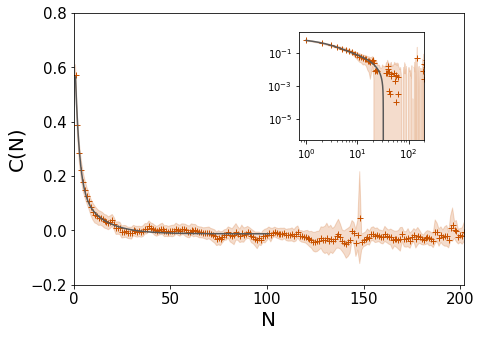

In [12]:
f=open('autocorrelation_log.txt',"r")  #OPEN THE TEXT FILE WITH THE AUTOCORRELATION VALUES UP TO TAU=600
lines=f.readlines()
data=[]
for x in lines:
    data.append(x.split('\n')[0])
f.close()

list_s=[]
for i in range(1,600):  #list of tau=1,2,...,600
    list_s.append(i)

data2=[]
for j in data:
    data2.append(float(j))  #list of autocorrelations (float format)
    
    
tau=np.array(list_s)        #tau and autocorrelation as an array
autocorr_vel=np.array(data2)



f2_original=open('autocorrelation__CI_plus_log.txt',"r")  #Open and read the results for the confidence interval
lines2_original=f2_original.readlines()
data3_original=[]
for xx2 in lines2_original:
    data3_original.append(float(xx2.split('\n')[0]))
f2_original.close()


f3_original=open('autocorrelation_CI_minus_log.txt',"r")  #Open and read the results for the confidence interval
lines3_original=f3_original.readlines()
data4_original=[]
for xx3 in lines3_original:
    data4_original.append(float(xx3.split('\n')[0]))
f3_original.close()




# Plot

fig, ax1 = plt.subplots(figsize=(7,5))  

# Exponential FIT  (up to tau=100)
popt, pcov = curve_fit(expDouble, tau[:100], autocorr_vel[:100], p0=(1,1,1,1,1))   
times = np.arange(tau[0], tau[100], 0.001)
model = expDouble(times, *popt)
perr = np.sqrt(np.diag(pcov))  #calcul error del parametre

ax1.plot(tau, autocorr_vel, '+', c='#C85200') 
ax1.plot(times, model, '-',c='#595959')
ax1.fill_between(tau, data4_original, data3_original, color='#C85200', alpha=.2)
ax1.set_ylabel(r'C(N)',fontsize=20)
ax1.set_xlabel(r'N',fontsize=20)
ax1.set_xlim(0,202)
ax1.set_ylim(-0.2,0.8)
ax1.tick_params(labelsize=15)
axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.51,1-0.45,.40,.40), bbox_transform=ax1.transAxes)
axins2.plot(tau, autocorr_vel, '+', c='#C85200')
axins2.fill_between(tau, data4_original, data3_original, color='#C85200', alpha=.2)
axins2.plot(times, model, '-r',c='#595959')
axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
axins2.set_xlim(0,200)


print('t high:', 1./popt[0], '+-', perr[0]/(popt[0]**2))
print('t low:', 1./popt[2], '+-', perr[2]/(popt[2]**2))


#fig.savefig('autocorrelation_log.pdf',format='pdf', bbox_inches='tight')

plt.show()



# 2. Autocorrelation Interpolated Data

We repeat the code above but using the interpolated data (uniformly distributed every 1 second)

In [ ]:
all_files = glob.glob(os.path.join("*.csv")) #make list of paths

corr_mean_s=[]
for s in range(1,600):   
    corr_mean_n=[]
    print(s)
    for file in all_files: 
        df = pd.read_csv(file)   
        df2=df.copy() 

        if 'index' in df2:   # if the file has the column index, delete it
            del df2['index']

        df2['time'] = pd.to_datetime(df2['time'])   # Time to datetime format
        df2.index = df2['time']  # Then convert the column time into index
        
        del df2['time']  # delete column time
        del df2['nickname']
        del df2['At']
        del df2['d']
        del df2['v']

        # Resample time index every second and interpolate
        df2=df2.resample('1S').asfreq().interpolate()
        df2.reset_index(level=0, inplace=True)

    # We calculate the time difference and the distance every "s" points (timesteps). So if s=1 we obtain the At/dist/vel. every
    # timestep (i.e. consecutive). If s=2, we calculate the differece between points separated 2 steps (t2-t0, t3-t1,...) and so
        At=[]
        distance=[]
        for i in range(1,len(df2['time'])):
            At.append((df2['time'][i]-df2['time'][i-1]).total_seconds())
            dist=getDistanceFromLatLonInM(df2['latitude'][i-1],df2['longitude'][i-1],df2['latitude'][i],df2['longitude'][i])
            distance.append(dist)

        At.insert(len(At), np.nan)
        distance.insert(len(distance), np.nan)

        df2['At']=At                # Insert the columns into the dataframe, calculate v (same as d if At=1s.)
        df2['d']=distance           # Then get a list of non NaN velocities, and obtain the mean value and the pdf for each s
        df2['v']=df2['d']/df2['At']
     
        v=df2['v'][:-1].tolist()
        mean_v=sum(v)/len(v)
        u=[]
        for i in range(len(v)):
            v_log=np.log(v[i]/mean_v)
            u.append(v_log)
            
        
        if len(u) > s:
            mean=sum(u)/len(u)
            variance = sum([((y - mean) ** 2) for y in u]) / len(u)
            std= variance ** 0.5  

            delta_r_i_rescaled = [(x - mean)/std for x in u]
            
            res = tuple( i*j for i, j in zip(delta_r_i_rescaled, delta_r_i_rescaled[s:])) 
            average_corr=sum(res)/len(res)    
            corr_mean_n.append(average_corr)
            
    
    corr_mean_n2=sum(corr_mean_n)/len(corr_mean_n)
    corr_mean_s.append(corr_mean_n2)

autocorr=np.array(corr_mean_s)


#np.savetxt('autocorrelation_interpolation_log.txt', autocorr)





## 2.1. Plot and exponential fit

$C(\tau)=A e^{-a\tau} + B e^{-b\tau} + C$

<ipython-input-5-48620af6f1ee>:44: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-a*x)+ B*np.exp(-b*x)+ C
<ipython-input-9-79cee272cb0e>:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  axins2.plot(times, model, '-r',c='#595959')
<ipython-input-9-79cee272cb0e>:61: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-9-79cee272cb0e>:62: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)
<ipython-input-9-79cee272cb0e>:63: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.

t high: 21.91995647630589 +- 2.039719492980412
t low: 3.2977955786996667 +- 0.14564896059241692


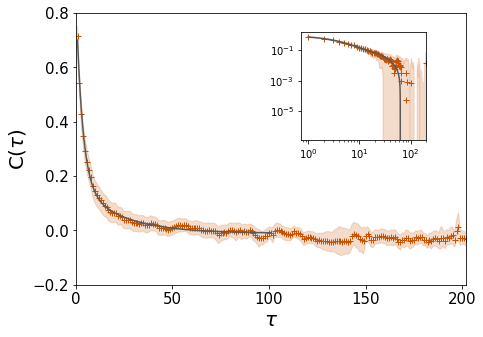

In [9]:
f=open('autocorrelation_interpolation_log.txt',"r")  #OPEN THE TEXT FILE WITH THE AUTOCORRELATION VALUES UP TO TAU=100
lines=f.readlines()
data=[]
for x in lines:
    data.append(x.split('\n')[0])
f.close()

list_s=[]
for i in range(1,600):  #list of tau=1,2,...,600
    list_s.append(i)

data2=[]
for j in data:
    data2.append(float(j))  #list of autocorrelations
    
    
tau=np.array(list_s)        #tau and autocorrelation as array
autocorr_vel=np.array(data2)


f2=open('autocorrelation_interpolation_CI_plus_log.txt',"r")   #Open the results for the confidence interval 
lines2=f2.readlines()
data3=[]
for x2 in lines2:
    data3.append(float(x2.split('\n')[0]))
f2.close()


f3=open('autocorrelation_interpolation_CI_minus_log.txt',"r")    #Open the results for the confidence interval 
lines3=f3.readlines()
data4=[]
for x3 in lines3:
    data4.append(float(x3.split('\n')[0]))
f3.close()




# Plot

fig, ax1 = plt.subplots(figsize=(7,5))  

# Exponential FIT  (up to tau=100)
popt, pcov = curve_fit(expDouble, tau[:100], autocorr_vel[:100], p0=(1,1,1,1,1))   
times = np.arange(tau[0], tau[100], 0.001)
model = expDouble(times, *popt)
perr = np.sqrt(np.diag(pcov))  #calcul error del parametre

ax1.plot(tau, autocorr_vel, '+', c='#C85200') 
ax1.fill_between(tau, data4, data3, color='#C85200', alpha=.2)
ax1.plot(times, model, '-',c='#595959')
ax1.set_ylabel(r'C($\tau$)',fontsize=20)
ax1.set_xlabel(r'$\tau$',fontsize=20)
ax1.set_xlim(0,202)
ax1.set_ylim(-0.2,0.8)
ax1.tick_params(labelsize=15)
axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.51,1-0.45,.40,.40), bbox_transform=ax1.transAxes)
axins2.plot(tau, autocorr_vel, '+', c='#C85200')
axins2.fill_between(tau, data4, data3, color='#C85200', alpha=.2)
axins2.plot(times, model, '-r',c='#595959')
axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
axins2.set_xlim(0,200)


print('t high:', 1./popt[0], '+-', perr[0]/(popt[0]**2))
print('t low:', 1./popt[2], '+-', perr[2]/(popt[2]**2))

#fig.savefig('autocorrelation_log_interpolation.pdf',format='pdf', bbox_inches='tight')

plt.show()


# 3. Comparing original and interpolated data

<ipython-input-6-3222986e142a>:10: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-a*x)+ B*np.exp(-b*x)+ C
<ipython-input-6-3222986e142a>:108: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins4.set_yscale('log',basey=10)
<ipython-input-6-3222986e142a>:109: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins4.set_xscale('log',basex=10)
<ipython-input-6-3222986e142a>:113: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axins4.set_xlim(0,102)
<ipython-input-6-3222986e142a>:114: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axins4.set_ylim(-0.1,0.8)



AUTOCORRELATION ORIGINAL
t low, a: 11.72920438026236 +- 1.3931702039321108
t high, b: 2.1266180331106086 +- 0.18872906502817677


AUTOCORRELATION INTEPROLATED
t low, a: 21.91995647630589 +- 2.039719492980412
t high, b: 3.2977955786996667 +- 0.14564896059241692


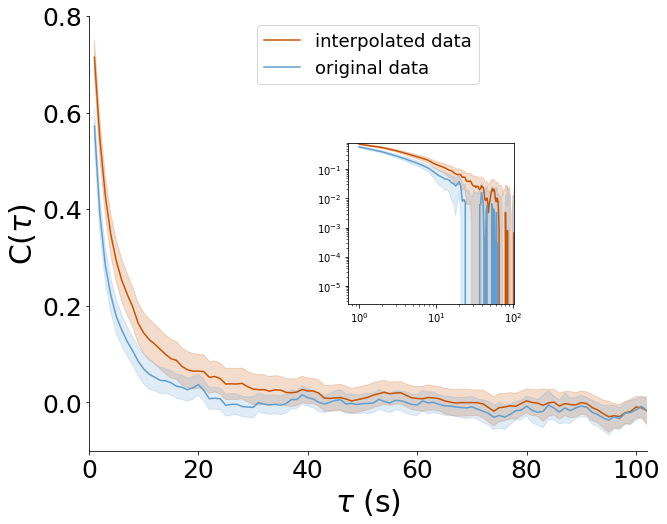

In [6]:
fig4, ax4 = plt.subplots(figsize=(10,8)) 
axins4 = inset_axes(ax4, width="80%", height="100%", loc=1,bbox_to_anchor=(0.40,1-0.65,.37,.37), bbox_transform=ax4.transAxes)

ax4.spines["top"].set_visible(False)    
ax4.spines["bottom"].set_visible(True)    
ax4.spines["right"].set_visible(False)    
ax4.spines["left"].set_visible(True)

def expDouble(x,a,A,b,B,C):
    return A*np.exp(-a*x)+ B*np.exp(-b*x)+ C


f=open('autocorrelation_interpolation_log.txt',"r")  #OPEN THE TEXT FILE WITH THE AUTOCORRELATION VALUES UP TO TAU=100
lines=f.readlines()
data=[]
for x in lines:
    data.append(x.split('\n')[0])
f.close()

f_original=open('autocorrelation_log.txt',"r")  #OPEN THE TEXT FILE WITH THE AUTOCORRELATION VALUES UP TO TAU=100
lines_original=f_original.readlines()
data_original=[]
for x_original in lines_original:
    data_original.append(x_original.split('\n')[0])
f_original.close()


f2=open('autocorrelation_interpolation_CI_plus_log.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
f2_original=open('autocorrelation__CI_plus_log.txt',"r")
lines2=f2.readlines()
lines2_original=f2_original.readlines()
data3=[]
data3_original=[]
for x2 in lines2:
    data3.append(float(x2.split('\n')[0]))
f2.close()

for xx2 in lines2_original:
    data3_original.append(float(xx2.split('\n')[0]))
f2_original.close()


f3=open('autocorrelation_interpolation_CI_minus_log.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
f3_original=open('autocorrelation_CI_minus_log.txt',"r")
lines3=f3.readlines()
lines3_original=f3_original.readlines()
data4=[]
data4_original=[]
for x3 in lines3:
    data4.append(float(x3.split('\n')[0]))
f3.close()

for xx3 in lines3_original:
    data4_original.append(float(xx3.split('\n')[0]))
f3_original.close()



list_s=[]
for i in range(1,600):  #list of tau=1,2,...,100
    list_s.append(i)

data2=[]
for j in data:
    data2.append(float(j))  #list of autocorrelations
    
    
data2_original=[]
for j_original in data_original:
    data2_original.append(float(j_original))  #list of autocorrelations
    
    
tau=np.array(list_s)        #tau and autocorrelation as array
autocorr_vel=np.array(data2)
autocorr_vel_original=np.array(data2_original)

popt_original, pcov_original = curve_fit(expDouble, tau[:100], autocorr_vel_original[:100], p0=(1,1,1,1,1))
times_original = np.arange(tau[0], tau[100], 0.01)
model_original = expDouble(times_original, *popt_original)
perr_original = np.sqrt(np.diag(pcov_original))  #calcul error del parametre

popt_int, pcov_int = curve_fit(expDouble, tau[0:100], autocorr_vel[0:100], p0=(1,1,1,1,1))
times_int = np.arange(tau[0], tau[100], 0.01)
model_int = expDouble(times_int, *popt_int)
perr_int = np.sqrt(np.diag(pcov_int))  #calcul error del parametre
print('')
print('AUTOCORRELATION ORIGINAL')
print('t low, a:', 1./popt_original[0], '+-', perr_original[0]/(popt_original[0]**2))
print('t high, b:', 1./popt_original[2], '+-', perr_original[2]/(popt_original[2]**2))
print('')
print('')
print('AUTOCORRELATION INTEPROLATED')
print('t low, a:', 1./popt_int[0], '+-', perr_int[0]/(popt_int[0]**2))
print('t high, b:', 1./popt_int[2], '+-', perr_int[2]/(popt_int[2]**2))


ax4.plot(tau, autocorr_vel, '-', c='#C85200',label='interpolated data')
ax4.plot(tau, autocorr_vel_original, '-',c='#5F9ED1', label='original data')
ax4.fill_between(tau, data4, data3, color='#C85200', alpha=.2)
ax4.fill_between(tau, data4_original, data3_original, color='#5F9ED1', alpha=.2)
ax4.set_ylabel(r'C($\tau$)',fontsize=30)
ax4.set_xlabel(r'$\tau$ (s)',fontsize=30)
ax4.tick_params(labelsize=25)
axins4.plot(tau, autocorr_vel, '-', c='#C85200', label='interpolated data')
axins4.plot(tau, autocorr_vel_original, '-',c='#5F9ED1', label='original data')
axins4.fill_between(tau, data4, data3, color='#C85200', alpha=.2)
axins4.fill_between(tau, data4_original, data3_original, color='#5F9ED1', alpha=.2)
axins4.set_yscale('log',basey=10)
axins4.set_xscale('log',basex=10)
ax4.set_xlim(0,102)
ax4.set_ylim(-0.1,0.8)
ax4.legend(loc='upper center', fontsize=18)
axins4.set_xlim(0,102)
axins4.set_ylim(-0.1,0.8)


#plt.savefig('interpolated_figures_autocorr.pdf',format='pdf', bbox_inches='tight')

plt.show()

# 4. Individual Autocorrelation

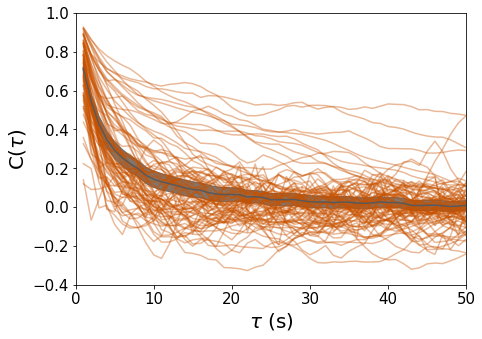

In [17]:
all_files = glob.glob(os.path.join("*.csv")) #make list of paths

fig, ax1 = pp.subplots(figsize=(7,5))

for file in all_files:
    
    df = pd.read_csv(file)   
    df2=df.copy() 
    
    if 'index' in df2:   # if the file has the column index, delete it
        del df2['index']

    df2['time'] = pd.to_datetime(df2['time'])   # Time to datetime format
    df2.index = df2['time']  # Then convert the column time into index

    del df2['time']  # delete column time
    del df2['nickname']
    del df2['At']
    del df2['d']
    del df2['v']

    # Resample time index every second and interpolate
    df2=df2.resample('1S').asfreq().interpolate()
    df2.reset_index(level=0, inplace=True)    
    
    At=[]
    distance=[]
    for i in range(1,len(df2['time'])):
        At.append((df2['time'][i]-df2['time'][i-1]).total_seconds())
        dist=getDistanceFromLatLonInM(df2['latitude'][i-1],df2['longitude'][i-1],df2['latitude'][i],df2['longitude'][i])
        distance.append(dist)

    At.insert(len(At), np.nan)
    distance.insert(len(distance), np.nan)

    df2['At']=At                # Insert the columns into the dataframe, calculate v (same as d if At=1s.)
    df2['d']=distance           # Then get a list of non NaN velocities, and obtain the mean value and the pdf for each s
    df2['v']=df2['d']/df2['At']

    delta_r_i=df2['d'][:-1].tolist()

    v=df2['v'][:-1].tolist()
    mean_v=sum(v)/len(v)
    u=[]
    for i in range(len(v)):
        v_log=np.log(v[i]/mean_v)
        u.append(v_log)
    
    
    corr_mean_n=[]
    ss=[]
    for s in range(1,len(u)):
        mean=sum(u)/len(u)
        variance = sum([((y - mean) ** 2) for y in u]) / len(u)
        std= variance ** 0.5  

        delta_r_i_rescaled = [(x - mean)/std for x in u]

        res = tuple( i*j for i, j in zip(delta_r_i_rescaled, delta_r_i_rescaled[s:])) 
        average_corr=sum(res)/len(res)    
        corr_mean_n.append(average_corr)
        ss.append(s)
    
    ax1.plot(ss, corr_mean_n, '-', c='#C85200', alpha=0.4)
    
    
    
f=open('autocorrelation_interpolation_log.txt',"r")  #OPEN THE TEXT FILE WITH THE AUTOCORRELATION VALUES 
lines=f.readlines()
data=[]
for x in lines:
    data.append(x.split('\n')[0])
f.close()

list_s=[]
for i in range(1,600):  #list of tau=1,2,...,100
    list_s.append(i)

data2=[]
for j in data:
    data2.append(float(j))  #list of autocorrelations
    
    
f2=open('autocorrelation_interpolation_CI_plus_log.txt',"r")  
lines2=f2.readlines()
data3=[]
for x2 in lines2:
    data3.append(float(x2.split('\n')[0]))
f2.close()

f3=open('autocorrelation_interpolation_CI_minus_log.txt',"r")  
lines3=f3.readlines()
data4=[]
for x3 in lines3:
    data4.append(float(x3.split('\n')[0]))
f3.close()

    
tau=np.array(list_s)        #tau and autocorrelation as array
autocorr_vel=np.array(data2)
ax1.plot(tau, autocorr_vel, '-', color ='#595959') 
ax1.set_xlim(0,50)
ax1.set_ylabel(r'C($\tau$)',fontsize=20)
ax1.set_xlabel(r'$\tau$ (s)',fontsize=20)
ax1.fill_between(tau, data4, data3, color='#595959', alpha=.8)
ax1.tick_params(labelsize=15)
ax1.set_ylim(-0.4,1.)

#fig.savefig('individual_autocorrelation.pdf',format='pdf', bbox_inches='tight')

plt.show()
